In [1]:
import numpy as np
import ipyvolume as ipv
from compas.geometry import Point, Frame, Box
from compas_vol.primitives import VolBox

In [38]:
from compas.geometry import Sphere
from compas_vol.primitives import VolSphere
from compas_vol.combinations import Union

In [64]:
box = Box(Frame(Point(2,3,1), (1,0.2,-0.3), (0,1,0.4)), 20, 20, 20)
vbox = VolBox(box, 4.0)

In [11]:
vbox.get_distance(Point(7,6,9))

3.0

In [53]:
x, y, z = np.ogrid[-20:20:128j, -20:20:128j, -20:20:128j]

In [24]:
x.shape

(50, 1, 1)

In [25]:
y.shape, z.shape

((1, 50, 1), (1, 1, 50))

In [26]:
dm = vbox.get_distance_numpy(x, y, z)

In [27]:
dm.shape

(50, 50, 50)

In [32]:
fig = ipv.figure()
ipv.volshow(dm)
ipv.show()

In [33]:
fig = ipv.figure()
mesh = ipv.plot_isosurface(dm, 0.0, color='white')
ipv.show()

In [49]:
sp = Sphere(Point(-4,-4,-4), 15)
vsp = VolSphere(sp)

In [65]:
su = Union(vbox, vsp)

In [66]:
dm = su.get_distance_numpy(x, y, z)

In [89]:
mesh.color = new_colors

In [88]:
fig = ipv.figure(width=800, height=450)
mesh = ipv.plot_isosurface(dm, 0.0, extent=[(-20,20) for _ in range(3)], color='white')
ipv.style.use('minimal')
ipv.show()

In [57]:
x

array([[[-20.        ]],

       [[-19.68503937]],

       [[-19.37007874]],

       [[-19.05511811]],

       [[-18.74015748]],

       [[-18.42519685]],

       [[-18.11023622]],

       [[-17.79527559]],

       [[-17.48031496]],

       [[-17.16535433]],

       [[-16.8503937 ]],

       [[-16.53543307]],

       [[-16.22047244]],

       [[-15.90551181]],

       [[-15.59055118]],

       [[-15.27559055]],

       [[-14.96062992]],

       [[-14.64566929]],

       [[-14.33070866]],

       [[-14.01574803]],

       [[-13.7007874 ]],

       [[-13.38582677]],

       [[-13.07086614]],

       [[-12.75590551]],

       [[-12.44094488]],

       [[-12.12598425]],

       [[-11.81102362]],

       [[-11.49606299]],

       [[-11.18110236]],

       [[-10.86614173]],

       [[-10.5511811 ]],

       [[-10.23622047]],

       [[ -9.92125984]],

       [[ -9.60629921]],

       [[ -9.29133858]],

       [[ -8.97637795]],

       [[ -8.66141732]],

       [[ -8.34645669]],

       [[ -8

leafnodes edgelength = $d / 2 ^ n$

In [69]:
import PIL.Image

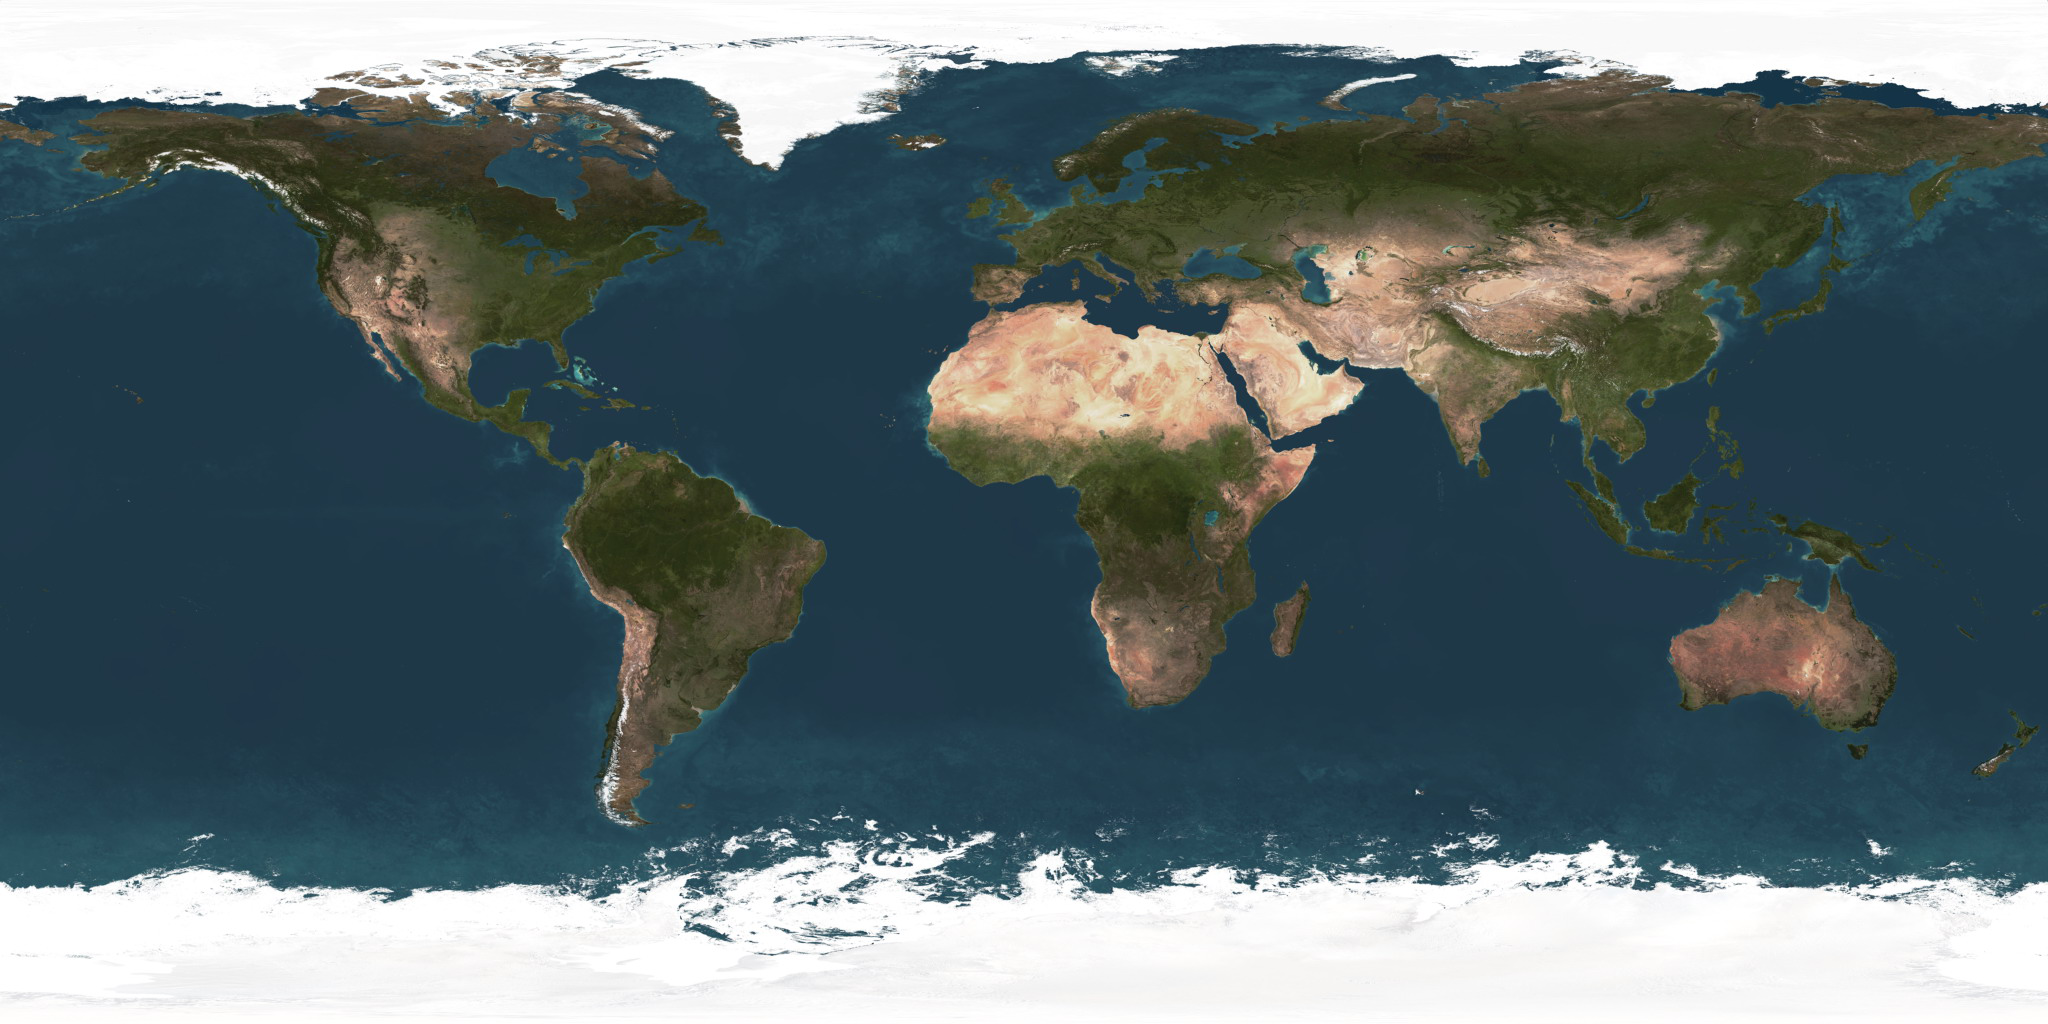

In [76]:
img = PIL.Image.open('LqQZu.jpg')
img

In [73]:
type(mesh)

ipyvolume.widgets.Mesh

In [80]:
mesh.__dict__

{'_trait_values': {'_model_module': 'ipyvolume',
  '_model_module_version': '~0.5.2',
  '_model_name': 'MeshModel',
  '_view_count': None,
  '_view_module': 'ipyvolume',
  '_view_module_version': '~0.5.2',
  '_view_name': 'MeshView',
  'sequence_index': 0,
  'visible': True,
  'x': array([-18.7415723 , -18.74015748, -18.74015748, ...,  14.0304229 ,
          14.02912771,  14.029368  ]),
  'y': array([-6.77165354, -6.77879033, -6.77165354, ..., -3.62204724,
         -3.30708661, -3.30708661]),
  'z': array([-3.93700787, -3.93700787, -4.15781337, ...,  2.36220472,
          2.04724409,  2.36220472]),
  'triangles': array([[    2,     1,     0],
         [    3,     0,     1],
         [    6,     5,     4],
         ...,
         [50844, 50741, 50743],
         [50844, 50743, 50845],
         [50845, 50743, 50733]], dtype=uint32),
  'lines': None,
  'color': array('white', dtype='<U5'),
  'u': array([0.5551824 , 0.55523984, 0.55518624, ..., 0.95979099, 0.96315505,
         0.96315566]),


In [77]:
import math

In [79]:
us = []
vs = []
zmax = mesh.z.max()
zmin = mesh.z.min()

for cx,cy,cz in zip(mesh.x, mesh.y, mesh.z):
    a = math.atan2(cy, -cx)/math.pi
    v = (cz-zmin)/(zmax-zmin)
    us.append(1-(a+1)/2)
    vs.append(v)

mesh.u = us
mesh.v = vs

mesh.texture = img

In [87]:
new_colors = []
for cx,cy,cz in zip(mesh.x, mesh.y, mesh.z):
    red = (1+math.sin(cx/5))/2
    green = (1+math.sin(cy/5))/2
    blue = (1+math.sin(cz/5))/2
    new_colors.append([red, green, blue, 1])

mesh.color = new_colors

In [83]:
len(new_colors)

50846

In [90]:
from compas_vol.utilities import export_ipv_mesh

In [91]:
export_ipv_mesh?

In [92]:
export_ipv_mesh(mesh, filename='ipv_mesh.obj', colors=new_colors)

In [93]:
import random

In [94]:
sphs = []
for i in range(7):
    center_point = [random.random()*20-10 for _ in range(3)]
    radius = 4 + random.random()*4
    s = VolSphere(Sphere(center_point, radius))
    sphs.append(s)
spheres_union = Union(sphs)

In [95]:
dm = spheres_union.get_distance_numpy(x, y, z)

In [96]:
fig = ipv.figure(width=800, height=450)
mesh = ipv.plot_isosurface(dm, 0.0, extent=[(-20,20) for _ in range(3)], color='white')
ipv.style.use('minimal')
ipv.show()

In [97]:
from compas_vol.modifications import Blur

In [100]:
blur = Blur(dm, 7)
dmb = blur.get_blurred()

In [101]:
fig = ipv.figure(width=800, height=450)
mesh = ipv.plot_isosurface(dmb, 0.0, extent=[(-20,20) for _ in range(3)], color='white')
ipv.style.use('minimal')
ipv.show()

In [102]:
from compas_vol.microstructures import Lattice

In [103]:
from compas_vol.combinations import Intersection

In [105]:
help(Lattice)

Help on class Lattice in module compas_vol.microstructures.lattice:

class Lattice(builtins.object)
 |  A lattice is defined by it's type, size of a unit cell and its strut diameter.
 |  Optionally, a frame can be specified to modify orientation and origin.
 |  
 |  Parameters
 |  ----------
 |  ltype : int
 |      The index to the type of lattice.
 |      A dictionary with indices and corresponding type names can be retrieved with the property `typenames`.
 |  unitcell : float
 |      The edgelength of a cubic unit cell.
 |  thickness : float
 |      The diameter of the struts.
 |  
 |  Examples
 |  --------
 |  >>> from compas_vol.microstructure import Lattice
 |  >>> lat = Lattice(5, 5.0, 0.3)
 |  >>> lat.frame = Frame((1, 0, 0), (1, 0.2, 0.1), (-0.3, 1, 0.2))
 |  
 |  Methods defined here:
 |  
 |  __init__(self, ltype=0, unitcell=1.0, thickness=0.1)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  create_points(self)
 |      Creates a list of 20 poin

In [129]:
lat = Lattice(1, 7.0, 2.0)

In [107]:
lat.typenames

{0: 'bigx',
 1: 'grid',
 2: 'star',
 3: 'cross',
 4: 'octagon',
 5: 'octet',
 6: 'vintile',
 7: 'dual',
 8: 'interlock',
 9: 'isotrop'}

In [138]:
lat.type = 8
lat.unitcell = 6
lat.thickness = 1
my_intersection = Intersection(su, lat)
dmi = my_intersection.get_distance_numpy(x, y, z)

In [139]:
fig = ipv.figure(width=800, height=450)
mesh = ipv.plot_isosurface(dmi, 0.0, extent=[(-20,20) for _ in range(3)], color='white')
ipv.style.use('minimal')
ipv.show()

In [140]:
from compas_vol.modifications import Shell

In [142]:
shell = Shell(su, 1.5, 0.5)

In [143]:
dms = shell.get_distance_numpy(x, y, z)

In [146]:
fig = ipv.figure(width=800, height=450)
mesh = ipv.plot_isosurface(dms, 0.0, extent=[(-20,20) for _ in range(3)], color='white')
ipv.style.use('minimal')
ipv.show()

In [149]:
usl = Union(shell, my_intersection)
dmu = usl.get_distance_numpy(x, y, z)

In [150]:
fig = ipv.figure(width=800, height=450)
mesh = ipv.plot_isosurface(dmu, 0.0, extent=[(-20,20) for _ in range(3)], color='white')
ipv.style.use('minimal')
ipv.show()

In [151]:
export_ipv_mesh(mesh,'latticefill.obj')